Лейкозные, здоровые и стволовые клетки объединены в один пул единичного объема. Если принять, что  
&nbsp;&nbsp;&nbsp;&nbsp;<b>us</b> - количество стволовых клеток, находящихся в нише,  
&nbsp;&nbsp;&nbsp;&nbsp;<b>uh</b> - здоровых,  
&nbsp;&nbsp;&nbsp;&nbsp;<b>ud</b> - лейкозных,  
&nbsp;&nbsp;&nbsp;&nbsp;<b>ua</b> - клеток микроокружения,

то их количество на момент начала кроветворения должно удовлетворять условию <b>uh + ud + us <= 1</b>. Распределение размножающихся стволовых клеток между больными и здоровыми происходит под влиянием клеток микроокружения ua в пропорциях <b>α : 1 - α (0 < α <=1)</b>. Здоровые, больные и стволовые клетки могут самостоятельно размножаться с удельными скоростями равными <b>μ1, μ2 и μ3</b> соответственно. Скорости перехода здоровых и больных клеток в кровеносное русло равны <b>ν1 и ν2</b> соответственно. Скорость перехода клеток <b>us</b> в здоровые и больные регулируется клетками микроокружения <b>ua</b>
.

$$
\frac{du_h}{dt} = \mu_1(1 - u_h - u_d - u_s)u_h + \alpha \gamma u_a u_s - \nu_1 u_h,
$$
$$
\frac{du_d}{dt} = \mu_2(1 - u_h - u_d - u_s)u_d + (1 - \alpha) \gamma u_a u_s - \nu_2 u_d,
$$
$$
\frac{du_s}{dt} = \mu_3(1 - u_h - u_d - u_s)u_s^2 - \gamma u_a u_s,
$$
$$
\frac{du_a}{dt} = -\mu_4 u_a (\beta - u_s).
$$


In [80]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [81]:
# Определение функции системы уравнений
def system(t, y, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2):
    _uh, _ud, _us, _ua = y
    dudt = [
        mu1 * (1 - _uh - _ud - _us) * _uh + alpha * gamma * _ua * _us - nu1 * _uh,
        mu2 * (1 - _uh - _ud - _us) * _ud + (1 - alpha) * gamma * _ua * _us - nu2 * _ud,
        mu3 * (1 - _uh - _ud - _us) * _us ** 2 - gamma * _ua * _us,
        -mu4 * _ua * (beta - _us)
    ]
    return dudt

In [82]:
# Параметры
params = {
    'mu1': 1, 'mu2': 1.5, 'mu3': 0.1, 'mu4': 0.1,
    'alpha': 0.2, 'beta': 0.35, 'gamma': 0.2,
    'nu1': 0.5, 'nu2': 0.5
}

# Начальные условия
uh, ud, us, ua = 0.55, 0.03, 0.1, 0.1
t_span = [0, 250]  # Временной интервал
intervals = np.linspace(t_span[0], t_span[1], 500)  # Интервалы для времени

In [83]:
# Решение системы уравнений
sol = solve_ivp(system, t_span, [uh, ud, us, ua], args=(params['mu1'], params['mu2'], params['mu3'], params['mu4'],
                                          params['alpha'], params['beta'], params['gamma'], params['nu1'], params['nu2']),
                method='RK45', t_eval=intervals)

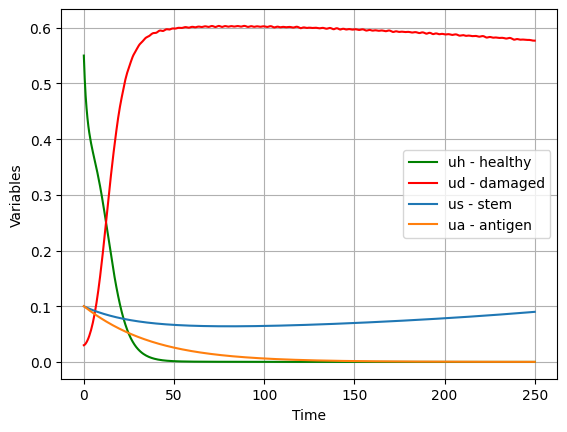

In [86]:
%matplotlib inline
# Визуализация результатов
plt.plot(sol.t, sol.y[0], label='uh - healthy', color='green')
plt.plot(sol.t, sol.y[1], label='ud - damaged', color='red')
plt.plot(sol.t, sol.y[2], label='us - stem')
plt.plot(sol.t, sol.y[3], label='ua - antigen')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()
plt.show()

In [74]:
%matplotlib notebook
# Инициализация фигуры и осей
fig, ax = plt.subplots(figsize=(10, 5))
lines = {
    'uh': ax.plot([], [], label='uh', color='green')[0],
    'ud': ax.plot([], [], label='ud', color='red')[0],
    'us': ax.plot([], [], label='us')[0],
    'ua': ax.plot([], [], label='ua')[0]
}
ax.set_xlabel('Time')
ax.set_ylabel('Variables')
ax.legend()
ax.grid(True)

# Функция для решения и отображения
def solve_and_plot(uh0, ud0, us0, ua0, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2):
    _sol = solve_ivp(system, t_span, [uh0, ud0, us0, ua0], args=(mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2),
                     method='RK45', t_eval=intervals)
    for var, line in lines.items():
        line.set_data(_sol.t, _sol.y[list(lines.keys()).index(var)])
    ax.relim()
    ax.autoscale_view()
    ax.set_ylim([np.min(_sol.y), np.max(_sol.y)*1.1])
    fig.canvas.draw_idle()  # Принудительное обновление канваса

# Интерактивные элементы
interact(solve_and_plot,
        uh0=FloatSlider(min=0, max=1, step=0.01, value=uh),
        ud0=FloatSlider(min=0, max=1, step=0.01, value=ud),
        us0=FloatSlider(min=0, max=1, step=0.01, value=us),
        ua0=FloatSlider(min=0, max=1, step=0.01, value=ua),
        mu1=FloatSlider(min=0, max=3, step=0.01, value=params['mu1']),
        mu2=FloatSlider(min=0, max=3, step=0.01, value=params['mu2']),
        mu3=FloatSlider(min=0, max=3, step=0.01, value=params['mu3']),
        mu4=FloatSlider(min=0, max=3, step=0.01, value=params['mu4']),
        alpha=FloatSlider(min=0, max=1, step=0.01, value=params['alpha']),
        beta=FloatSlider(min=0, max=1, step=0.01, value=params['beta']),
        gamma=FloatSlider(min=0, max=1, step=0.01, value=params['gamma']),
        nu1=FloatSlider(min=0, max=0.1, step=0.001, value=params['nu1']),
        nu2=FloatSlider(min=0, max=0.1, step=0.001, value=params['nu2']))

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.55, description='uh0', max=1.0, step=0.01), FloatSlider(value=0.03, …

<function __main__.solve_and_plot(uh0, ud0, us0, ua0, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2)>

https://mybinder.org/v2/gh/SergeevSergey99/Math_model/b1d6e7347a2927ad034a3754f8b4afc806370b0f?filepath=%D0%9C%D0%B0%D0%B3%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%B0%2F%D0%A1%D0%B5%D0%BC4%2F%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%2Fleikimia_test.ipynb

# Анализ чувствительности

In [120]:
from SALib.analyze import sobol
from SALib.sample.sobol import sample
import pandas as pd
from SALib.test_functions import Ishigami

In [94]:
# Определение модели
def model(params):
    sol = solve_ivp(system, t_span, [uh, ud, us, ua], args=(params['mu1'], params['mu2'], params['mu3'], params['mu4'],
                                          params['alpha'], params['beta'], params['gamma'], params['nu1'], params['nu2']),
                method='RK45', t_eval=intervals)
    return sol.y

In [88]:
# Определение диапазона параметров
problem = {
    'num_vars': 9,  # количество параметров
    'names': ['mu1', 'mu2', 'mu3', 'mu4', 'alpha', 'beta', 'gamma', 'nu1', 'nu2'],  # имена параметров
    'bounds': [[0.01, 0.1], [0.01, 0.1], [0.01, 0.1], [0.01, 0.1],
               [0.01, 0.1], [0.01, 0.1], [0.01, 0.1], [0.01, 0.1], [0.01, 0.1]]  # границы для каждого параметра
}

In [89]:
# Генерация выборок
param_values = sample(problem, 1024)

### S1: первый порядок индексов, указывающих влияние каждого параметра изолированно.
### ST: общий индекс, указывающий общее влияние параметра, включая взаимодействие с другими параметрами.

In [104]:
# Вычисление результатов модели для каждого набора параметров в здоровых клетках
YH = np.array([model(dict(zip(problem['names'], params)))[0][-1] for params in param_values])# Проведение анализа
SiH = sobol.analyze(problem, YH)

In [124]:
df_SiH = pd.DataFrame(data=[SiH['S1'], SiH['ST']], columns=problem['names'], index=['First', 'Total'])
df_SiH

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
First,0.210613,0.006765,0.000688,0.001452,-0.000157,0.000348,0.009806,0.628313,0.021978
Total,0.347478,0.020720,0.001548,0.000347,0.000021,0.000375,0.008689,0.810228,0.047715


In [106]:
# Вычисление результатов модели для каждого набора параметров в больных клетках
YD = np.array([model(dict(zip(problem['names'], params)))[1][-1] for params in param_values])

# Проведение анализа
SiD = sobol.analyze(problem, YD)

In [125]:
df_SiD = pd.DataFrame(data=[SiD['S1'], SiD['ST']], columns=problem['names'], index=['First', 'Total'])
df_SiD

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
First,0.021060,0.166554,0.005100,0.003901,0.000097,0.002269,-0.009493,0.079191,0.508465
Total,0.061321,0.357358,0.017514,0.003356,0.000037,0.001373,0.016805,0.168684,0.706811


In [108]:
# Вычисление результатов модели для каждого набора параметров в стволовых клетках
YS = np.array([model(dict(zip(problem['names'], params)))[2][-1] for params in param_values])

# Проведение анализа
SiS = sobol.analyze(problem, YS)

In [126]:
df_SiS = pd.DataFrame(data=[SiS['S1'], SiS['ST']], columns=problem['names'], index=['First', 'Total'])
df_SiS

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
First,0.013161,-0.004434,0.093277,0.019585,-0.000108,0.016729,0.326703,0.034757,0.014760
Total,0.060019,0.057351,0.577425,0.256946,0.000007,0.045197,0.720309,0.192959,0.088361


In [127]:
# Вычисление результатов модели для каждого набора параметров в стволовых клетках
YA = np.array([model(dict(zip(problem['names'], params)))[3][-1] for params in param_values])

# Проведение анализа
SiA = sobol.analyze(problem, YA)

C:\Users\Сергей\Math_model\venv\lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [128]:
df_SiA = pd.DataFrame(data=[SiA['S1'], SiA['ST']], columns=problem['names'], index=['First', 'Total'])
df_SiA

,mu1,mu2,mu3,mu4,alpha,beta,gamma,nu1,nu2
First,0.001965,-0.000547,0.066228,0.008756,0.000012,0.008585,0.179676,0.015481,-0.003775
Total,0.163839,0.064500,0.687180,0.178285,0.000004,0.018748,0.782707,0.169808,0.172337
